# 第7.1章 幂法

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def power_method(A, N, u, v, print_idx_list=[]):
    approx_u = []
    approx_eig = []
    approx_eig_Rayleigh = []

    for k in range(1, N+1):
        v = np.matmul(A, u)
        largest_abs_value = max(v, key=abs)
        u = v / largest_abs_value
        approx_eig.append(largest_abs_value)
        approx_u.append(u)
        approx_eig_Rayleigh.append(np.dot(u, np.matmul(A,u))/np.dot(u,u))

        if k in print_idx_list:
            print("k = {:2d}, u = [{:.4f} {:.4f} {:.4f}]".format(k,u[0],u[1],u[2]))

    return approx_eig, approx_u, approx_eig_Rayleigh, u, v

In [3]:
# 课本例题9.1

A = np.array([[1.0, 1.0, 0.5],[1.0, 1.0, 0.25], [0.5, 0.25, 2.0]])
eigv, eigvec = np.linalg.eig(A)
exact_value = max(eigv, key=abs)
print("准确值为{:.4f}".format(exact_value))

N = 20 # 迭代次数
u = np.array([1,1,1])
v = copy.deepcopy(u)
print_idx_list = [1,5]

approx_eig, approx_u, approx_eig_Rayleigh, u, v = power_method(A, N, u, v, print_idx_list=print_idx_list)

准确值为2.5365
k =  1, u = [0.9091 0.8182 1.0000]
k =  5, u = [0.7651 0.6674 1.0000]


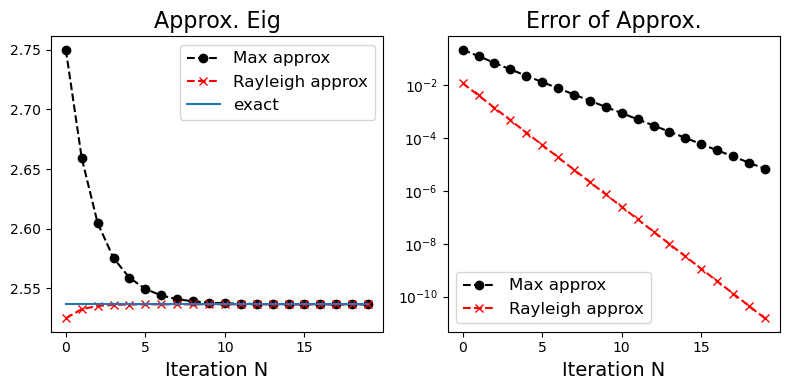

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(approx_eig, 'ko--', label="Max approx")
plt.plot(approx_eig_Rayleigh, 'rx--', label="Rayleigh approx")
plt.plot(exact_value*np.ones(len(approx_eig)), label="exact")
plt.legend(fontsize=12)
plt.xlabel("Iteration N",fontsize=14)
plt.title("Approx. Eig",fontsize=16)

plt.subplot(1,2,2)
plt.plot(np.abs(approx_eig - exact_value), 'ko--', label="Max approx")
plt.plot(np.abs(approx_eig_Rayleigh - exact_value), 'rx--', label="Rayleigh approx")
plt.yscale("log")
plt.xlabel("Iteration N",fontsize=14)
plt.legend(fontsize=12)
plt.title("Error of Approx.",fontsize=16)

plt.tight_layout()
plt.show()